In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [35]:
df = pd.read_csv('df_1.csv', index_col = 0, header = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 351
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Entity             352 non-null    object
 1   Year               352 non-null    object
 2   Records            350 non-null    object
 3   Organization type  352 non-null    object
 4   Method             351 non-null    object
 5   Sources            350 non-null    object
dtypes: object(6)
memory usage: 19.2+ KB


In [4]:
df.head()

,Entity,Year,Records,Organization type,Method,Sources
0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,500px,2020,14870304,social networking,hacked,[7]
2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


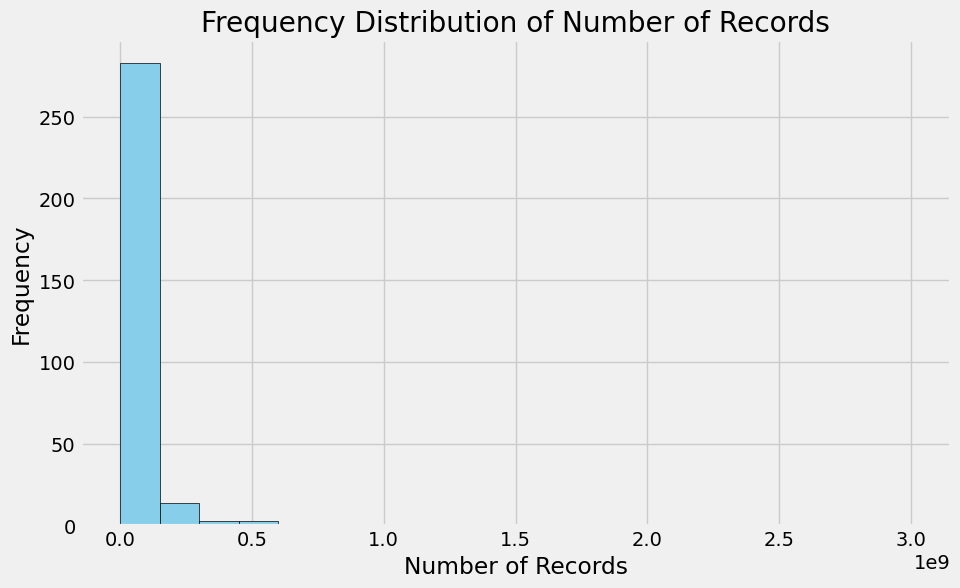

In [8]:
# create frequency distribution of number of records 
#Drop rows with NaN values in the 'Records' column for plotting
df_records = df.dropna(subset=['Records'])

# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(df_records['Records'], bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Number of Records')
plt.xlabel('Number of Records')
plt.ylabel('Frequency')
plt.show()

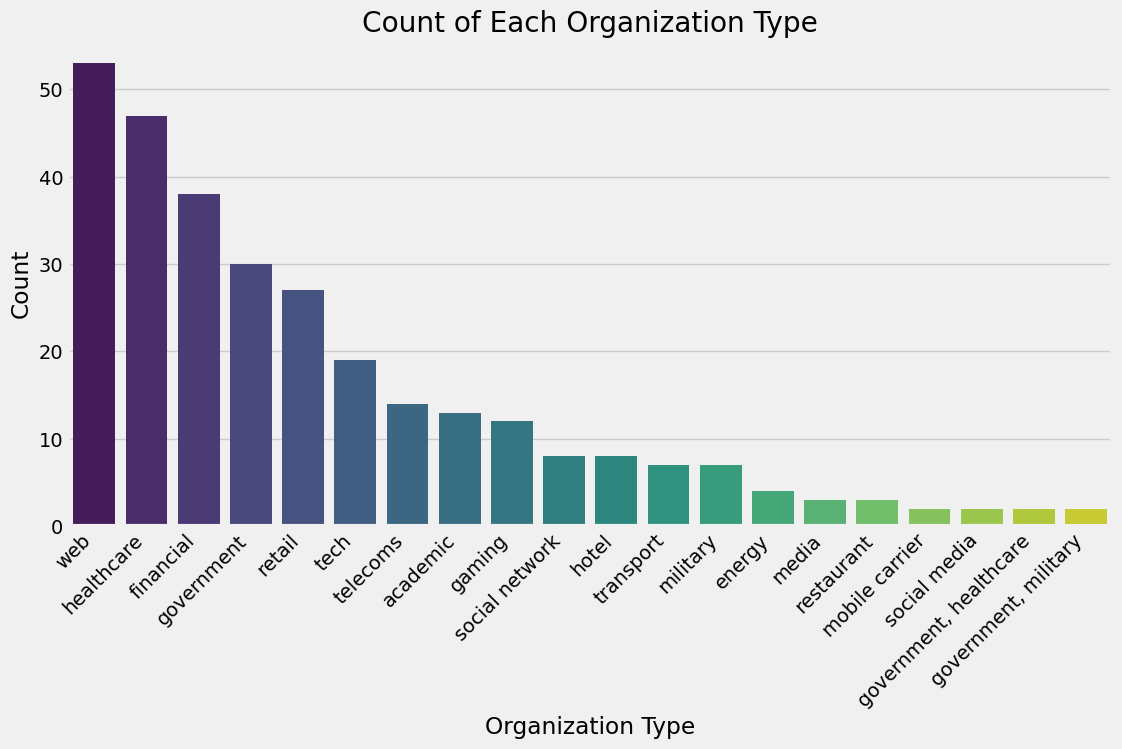

In [15]:
# Replace "telecom" with "telecoms" in the 'Organization type' column
df['Organization type'] = df['Organization type'].replace('telecom', 'telecoms')

# Count the occurrences of each organization type
organization_counts = df['Organization type'].value_counts()
# Select top 20 organization types
top_20_organizations = organization_counts.head(20)

# Plot the counts using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_organizations.index, y=top_20_organizations.values, palette='viridis')
plt.title('Count of Each Organization Type')
plt.xlabel('Organization Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

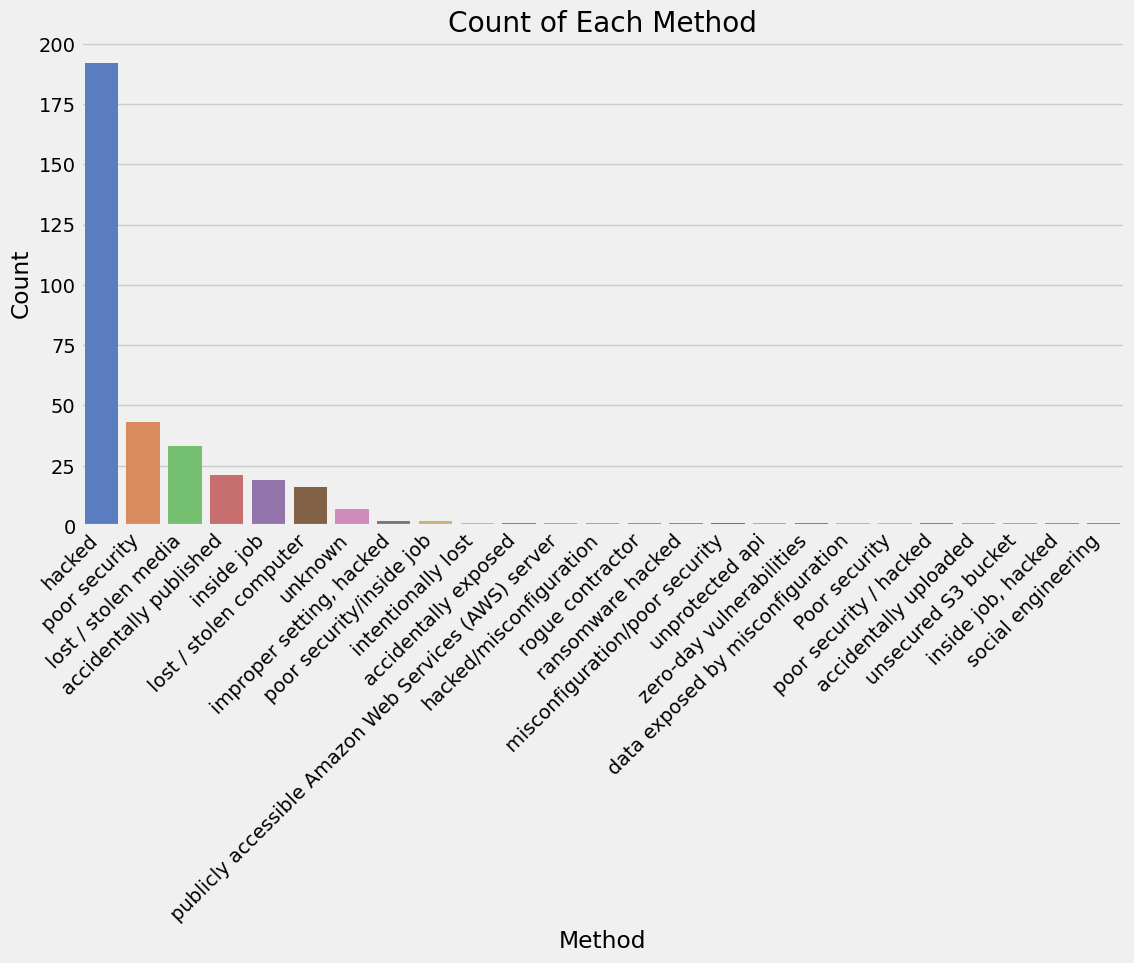

In [16]:
# Count the occurrences of each method
method_counts = df['Method'].value_counts()

# Plot the counts using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=method_counts.index, y=method_counts.values, palette='muted')
plt.title('Count of Each Method')
plt.xlabel('Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

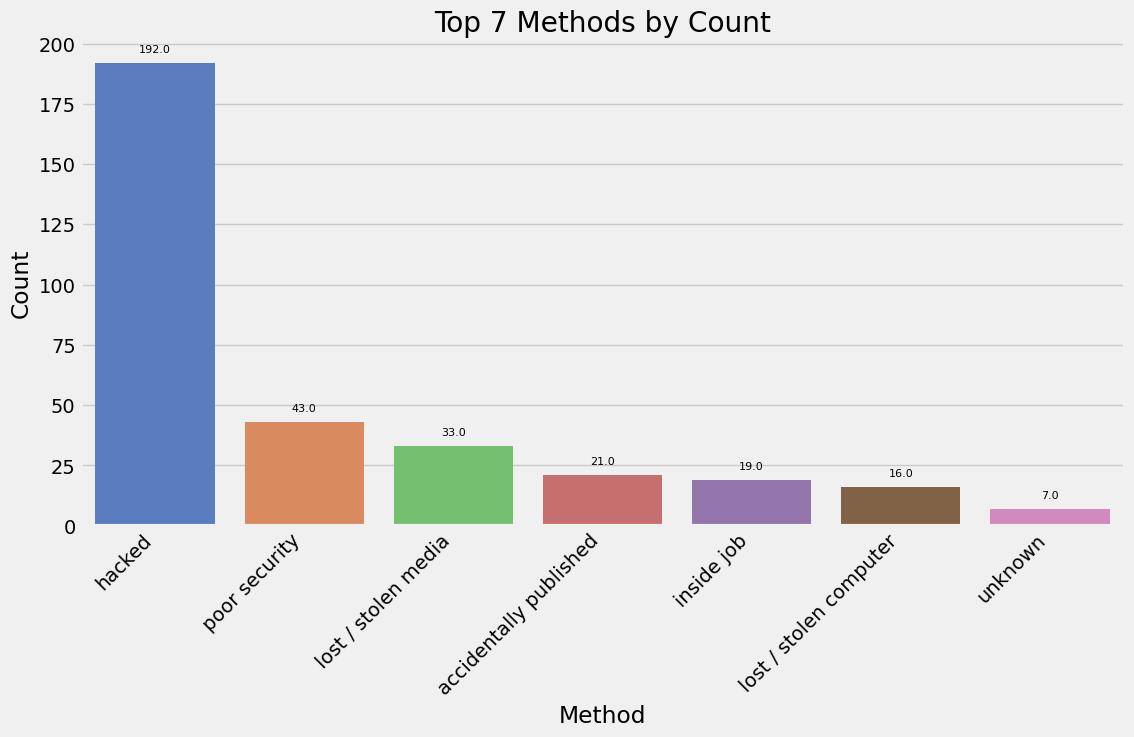

In [20]:
# Count the occurrences of each method
method_counts = df['Method'].value_counts()

# Select the top 7 methods
top_7_methods = method_counts.head(7)

# Plot the top 7 counts using a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_7_methods.index, y=top_7_methods.values, palette='muted')
# Add annotations on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Top 7 Methods by Count')
plt.xlabel('Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

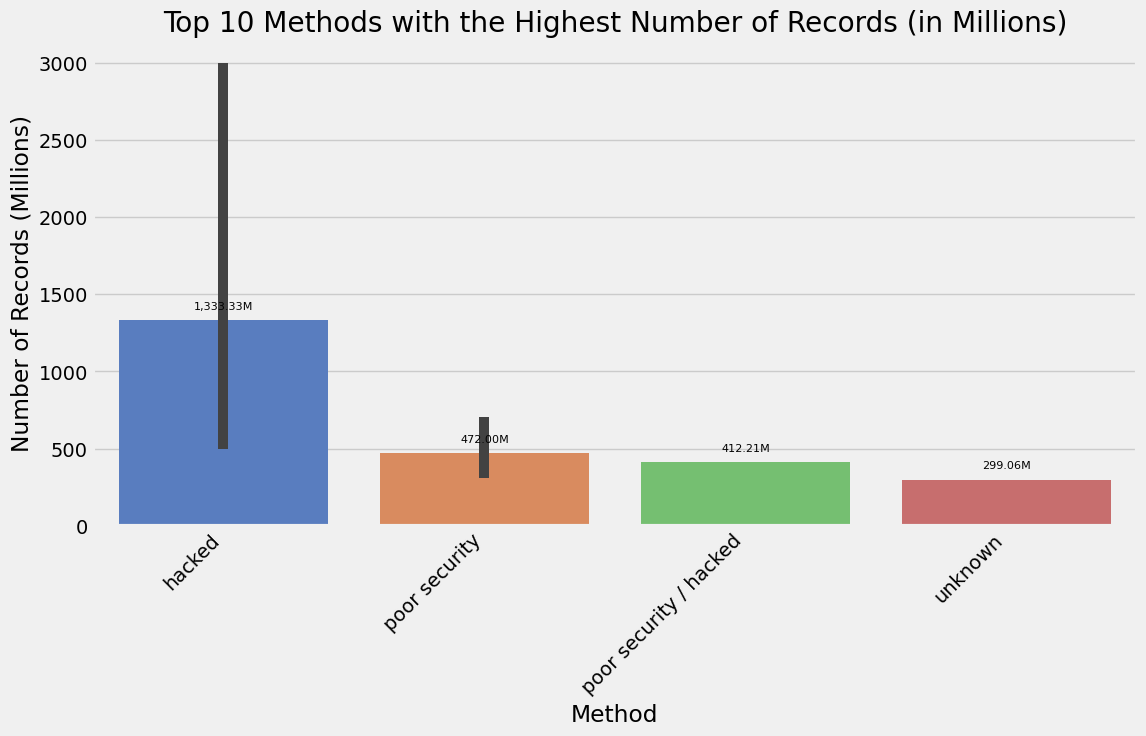

In [30]:

# Drop rows with NaN values in the 'Records' column for analysis
df_records = df.dropna(subset=['Records'])

# Sort the DataFrame based on the 'Records' column in descending order
sorted_df = df_records.sort_values(by='Records', ascending=False)

# Select the top 10 methods with the highest records
top_methods_records = sorted_df.head(10)

# Convert 'Records' to millions
top_methods_records['Records'] = top_methods_records['Records'] / 1e6

# Plot the top methods with the highest records in millions
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Method', y='Records', data=top_methods_records, palette='muted')

# Add annotations on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Top 10 Methods with the Highest Number of Records (in Millions)')
plt.xlabel('Method')
plt.ylabel('Number of Records (Millions)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility


plt.show()


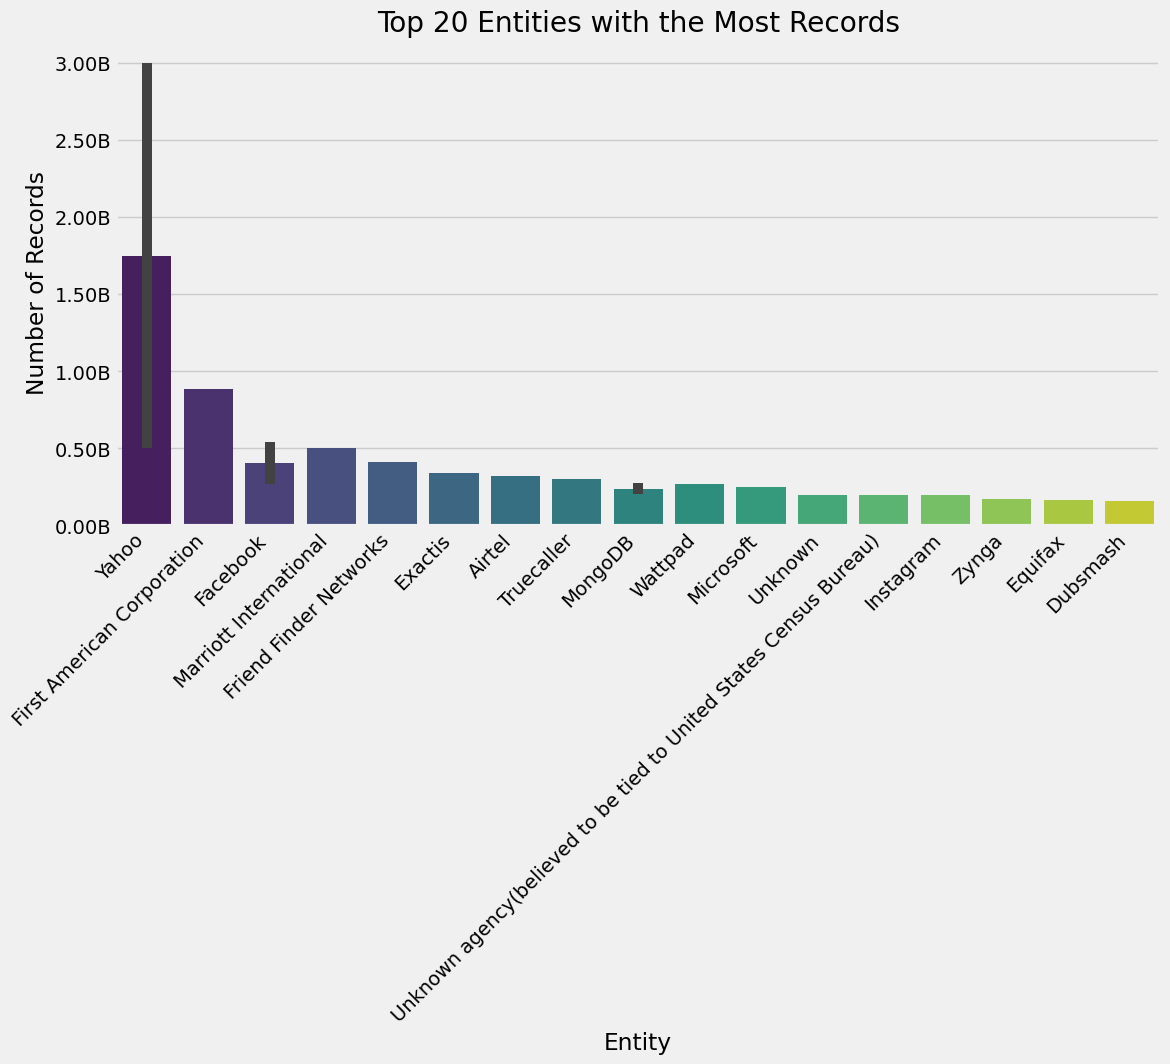

In [43]:
# Convert 'Records' column to numeric
df['Records'] = pd.to_numeric(df['Records'], errors='coerce')


# Drop rows with NaN values in the 'Records' column for analysis
df_records = df.dropna(subset=['Records'])

# Sort the DataFrame based on the 'Records' column in descending order
sorted_df = df_records.sort_values(by='Records', ascending=False)

# Select the top 20 entities with the highest records
top_entities_records = sorted_df.head(20)

# Plot the top entities with the highest records
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Entity', y='Records', data=top_entities_records, palette='viridis', linewidth=0)

# Change the y-axis scale to billions
bar_plot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x / 1e9:,.2f}B'))

plt.title('Top 20 Entities with the Most Records')
plt.xlabel('Entity')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility


plt.show()


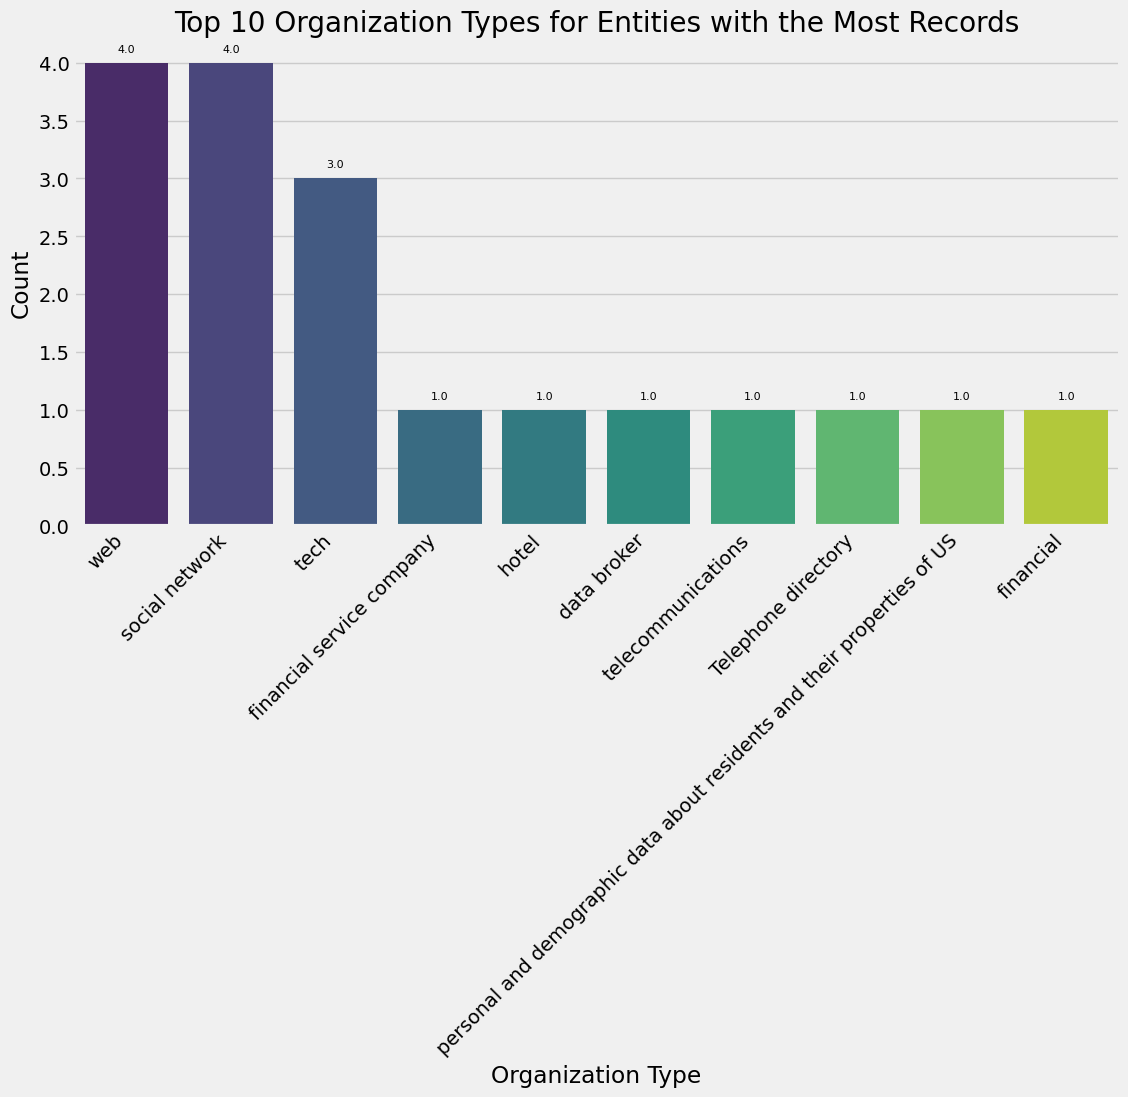

In [44]:
# Assuming 'Organization type' is the column name for organization types
# If it's different, replace it accordingly in the code

# Select the top 20 entities with the highest records
top_entities_records = sorted_df.head(20)

# Get the unique organization types for the top entities
unique_org_types = top_entities_records['Organization type'].unique()

# Count the occurrences of each organization type for the top entities
org_type_counts = top_entities_records['Organization type'].value_counts()

# Select the top 10 organization types
top_10_org_types = org_type_counts.head(10)

# Plot the top 10 organization types
plt.figure(figsize=(12, 6))
bar_plot_org_types = sns.barplot(x=top_10_org_types.index, y=top_10_org_types.values, palette='viridis')

# Add annotations on top of each bar
for p in bar_plot_org_types.patches:
    bar_plot_org_types.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Top 10 Organization Types for Entities with the Most Records')
plt.xlabel('Organization Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Remove top and right spines
sns.despine()

plt.show()


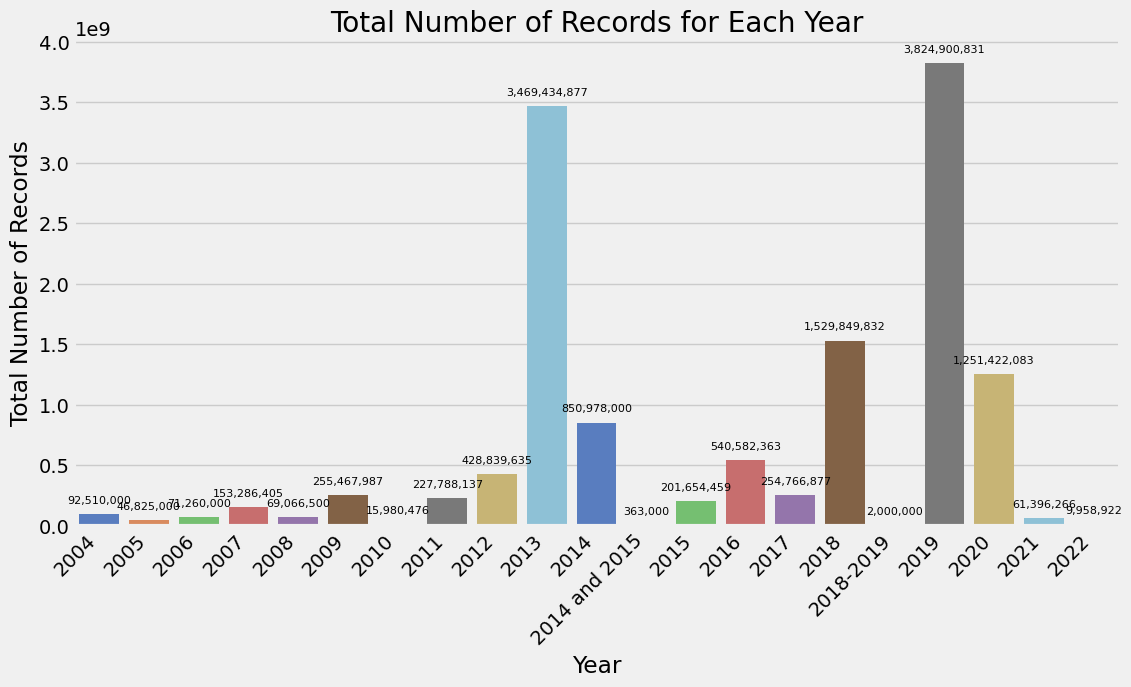

In [45]:
# Assuming 'Year' is the column name for the year
# If it's different, replace it accordingly in the code

# Convert 'Records' column to numeric
df['Records'] = pd.to_numeric(df['Records'], errors='coerce')

# Drop rows with NaN values in the 'Records' column for analysis
df_records = df.dropna(subset=['Records'])

# Group by year and calculate the total number of records for each year
records_by_year = df_records.groupby('Year')['Records'].sum().reset_index()

# Plot the total number of records for each year
plt.figure(figsize=(12, 6))
bar_plot_yearly_records = sns.barplot(x='Year', y='Records', data=records_by_year, palette='muted')

# Add annotations on top of each bar
for p in bar_plot_yearly_records.patches:
    bar_plot_yearly_records.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Total Number of Records for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Records')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Remove top and right spines
sns.despine()

plt.show()


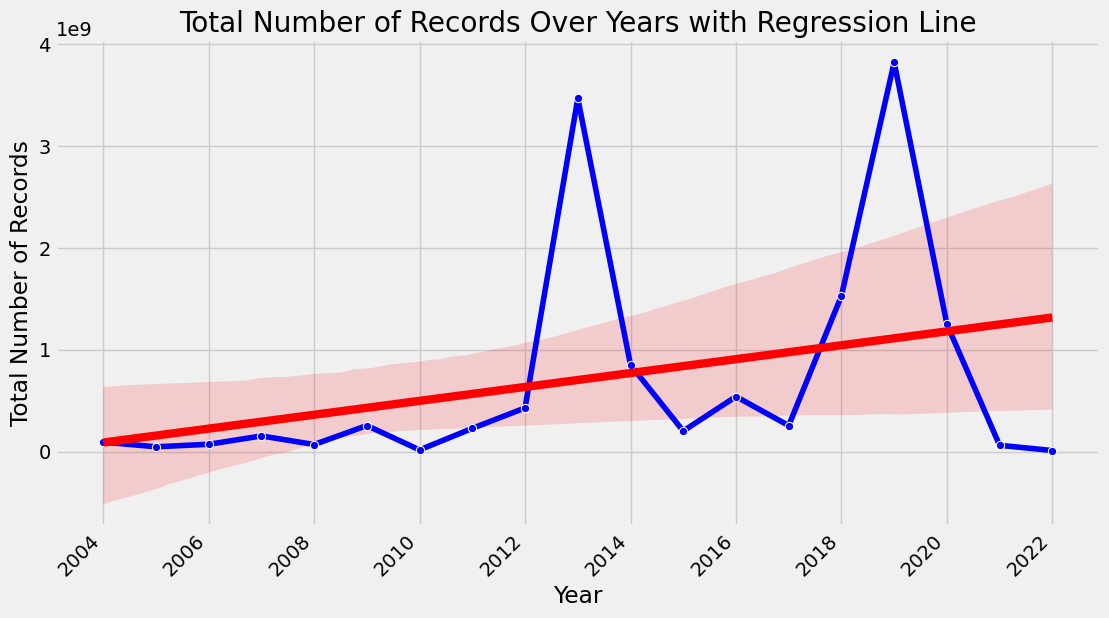

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker

# Assuming 'Year' is the column name for the year
# If it's different, replace it accordingly in the code

# Convert 'Year' to numeric (integer)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce', downcast='integer')

# Drop rows with NaN values in the 'Records' column for analysis
df_records = df.dropna(subset=['Records'])

# Group by year and calculate the total number of records for each year
records_by_year = df_records.groupby('Year')['Records'].sum().reset_index()

# Plot the total number of records for each year with a regression line
plt.figure(figsize=(12, 6))
line_plot_yearly_records = sns.lineplot(x='Year', y='Records', data=records_by_year, marker='o', color='b')

# Add a regression line
sns.regplot(x='Year', y='Records', data=records_by_year, ax=plt.gca(), scatter=False, color='red')

plt.title('Total Number of Records Over Years with Regression Line')
plt.xlabel('Year')
plt.ylabel('Total Number of Records')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Set the major locator of x-axis ticks to display only integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


In [51]:
# Assuming 'Year' is the column name for the year
# If it's different, replace it accordingly in the code

# Convert 'Year' to numeric (integer)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce', downcast='integer')

# Drop rows with NaN values in the 'Records' column for analysis
df_records = df.dropna(subset=['Records'])

# Filter the DataFrame for the years 2013 and 2019
df_2013 = df_records[df_records['Year'] == 2013]
df_2019 = df_records[df_records['Year'] == 2019]

# Display information for the year 2013
print("Information for the year 2013:")
print(df_2013)

# Display information for the year 2019
print("\nInformation for the year 2019:")
print(df_2019)


Information for the year 2013:
                                     Entity    Year       Records  \
3                Adobe Systems Incorporated  2013.0  1.520000e+08   
7                Affinity Health Plan, Inc.  2013.0  3.445790e+05   
57            Central Hudson Gas & Electric  2013.0  1.100000e+05   
64                                Citigroup  2013.0  1.500000e+05   
75          Crescent Health Inc., Walgreens  2013.0  1.000000e+05   
90                                   Drupal  2013.0  1.000000e+06   
93                         Dun & Bradstreet  2013.0  1.000000e+06   
105                                Evernote  2013.0  5.000000e+07   
110                                Facebook  2013.0  6.000000e+06   
120  Florida Department of Juvenile Justice  2013.0  1.000000e+05   
161              Kirkwood Community College  2013.0  1.250000e+05   
165                Kroll Background America  2013.0  1.000000e+06   
173                           Living Social  2013.0  5.000000e+07   
209

In [52]:

# Convert 'Year' to numeric (integer)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce', downcast='integer')

# Drop rows with NaN values in the 'Records' column for analysis
df_records = df.dropna(subset=['Records'])

# Filter the DataFrame for the years 2013 and 2019
df_2013 = df_records[df_records['Year'] == 2013]
df_2019 = df_records[df_records['Year'] == 2019]

# Find the largest records in 2013 and 2019
max_records_2013 = df_2013['Records'].max()
max_records_2019 = df_2019['Records'].max()

print(f"The largest records in 2013: {max_records_2013}")
print(f"The largest records in 2019: {max_records_2019}")


The largest records in 2013: 3000000000.0
The largest records in 2019: 885000000.0


In [53]:

# Convert 'Year' to numeric (integer)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce', downcast='integer')

# Drop rows with NaN values in the 'Records' column for analysis
df_records = df.dropna(subset=['Records'])

# Filter the DataFrame for the years 2013 and 2019
df_2013 = df_records[df_records['Year'] == 2013]
df_2019 = df_records[df_records['Year'] == 2019]

# Find the entity with the largest records in 2013
max_records_entity_2013 = df_2013.loc[df_2013['Records'].idxmax()]['Entity']

# Find the entity with the largest records in 2019
max_records_entity_2019 = df_2019.loc[df_2019['Records'].idxmax()]['Entity']

print(f"The entity with the largest records in 2013: {max_records_entity_2013}")
print(f"The entity with the largest records in 2019: {max_records_entity_2019}")


The entity with the largest records in 2013: Yahoo
The entity with the largest records in 2019: First American Corporation
